In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                
import statsmodels.api as sm  

from pandas import DataFrame
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv("data.csv") 

In [3]:
data_original=data.copy()

In [4]:
data.columns

Index(['product_id', 'calendar_date', 'volume_sold', 'revenue', 'cost', 'vdm1',
       'vwm1', 'vmm1', 'vmm2', 'vmm13', 'rdm1', 'rwm1', 'rmm1', 'rmm2',
       'rmm13', 'cdm1', 'cwm1', 'cmm1', 'cmm2', 'cmm13', 'mpdm1', 'mpwm1',
       'mpmm1', 'mpmm2', 'mpmm13', 'stock_level', 'retail_price', 'woy'],
      dtype='object')

In [5]:
data.dtypes

product_id         int64
calendar_date     object
volume_sold        int64
revenue          float64
cost             float64
vdm1               int64
vwm1               int64
vmm1               int64
vmm2               int64
vmm13              int64
rdm1             float64
rwm1             float64
rmm1             float64
rmm2             float64
rmm13            float64
cdm1             float64
cwm1             float64
cmm1             float64
cmm2             float64
cmm13            float64
mpdm1            float64
mpwm1            float64
mpmm1            float64
mpmm2            float64
mpmm13           float64
stock_level        int64
retail_price     float64
woy              float64
dtype: object

In [6]:
data.shape

(1340, 28)

In [7]:
data['calendar_date'] = pd.to_datetime(data.calendar_date,format='%m/%d/%Y') 

In [8]:
data['year']=data.calendar_date.dt.year 
data['month']=data.calendar_date.dt.month 
data['day']=data.calendar_date.dt.day

In [9]:
data['day of week']=data['calendar_date'].dt.dayofweek 

In [10]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = data['calendar_date'].apply(applyer) 
data['weekend']=temp2

In [11]:
data.index = data['calendar_date']

In [12]:
data.sort_index(inplace=True)

### ALL items together

No handles with labels found to put in legend.


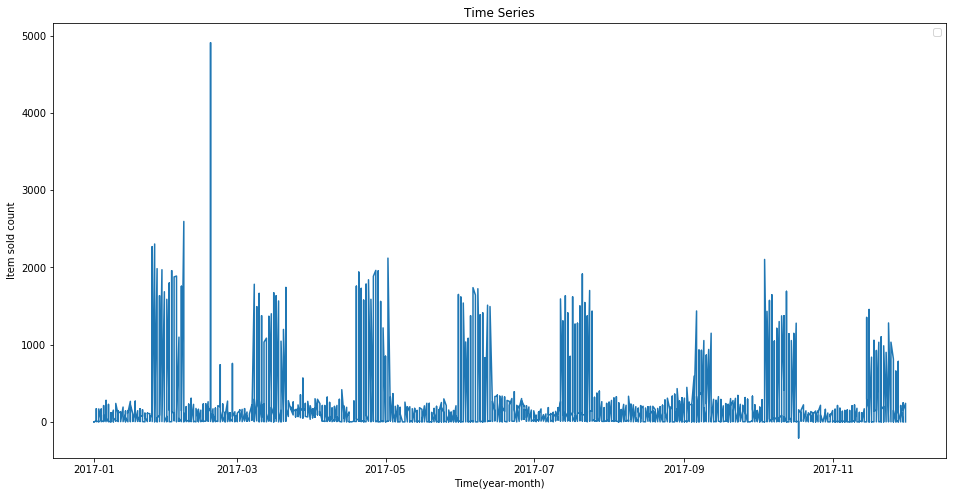

In [14]:
train_df=data 
ts = train_df['volume_sold'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts)
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Item sold count") 
plt.legend(loc='best')

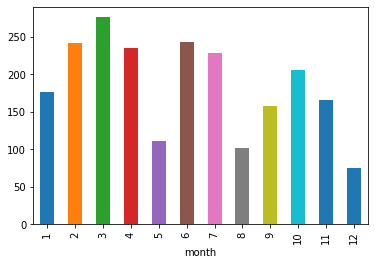

In [15]:
data.groupby('month')['volume_sold'].mean().plot.bar()

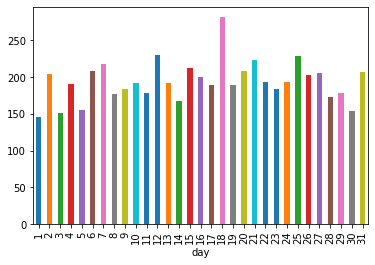

In [15]:
data.groupby('day')['volume_sold'].mean().plot.bar()

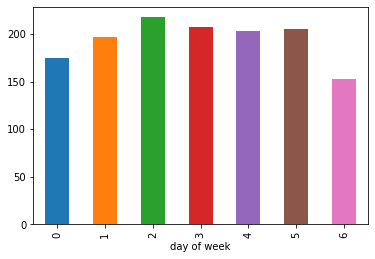

In [16]:
data.groupby('day of week')['volume_sold'].mean().plot.bar()

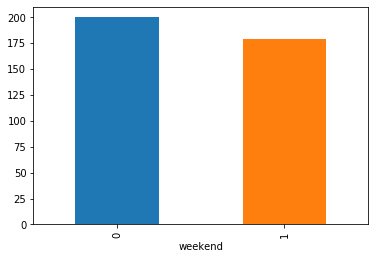

In [17]:
data.groupby('weekend')['volume_sold'].mean().plot.bar()

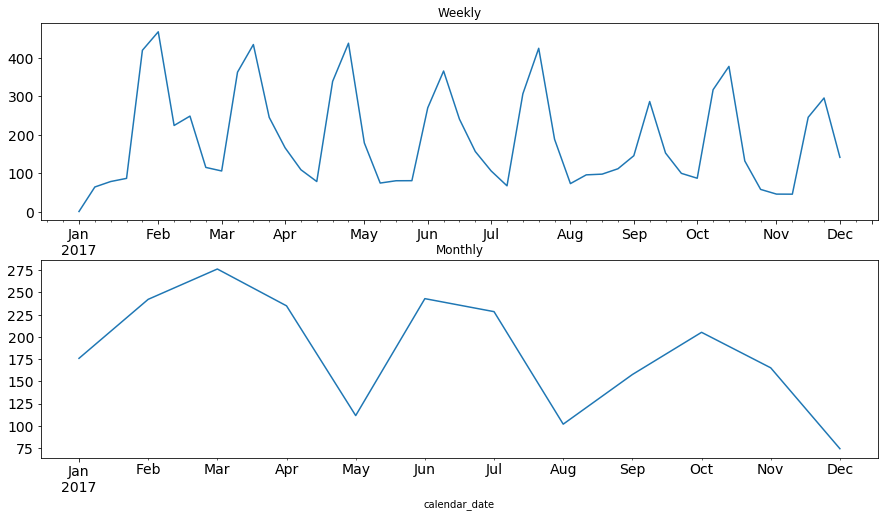

In [16]:
train_df=data

# Converting to weekly mean 
weekly = train_df.resample('W').mean() 
# Converting to monthly mean 
monthly = train_df.resample('M').mean()

fig, axs = plt.subplots(2,1) 
weekly.volume_sold.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[0]) 
monthly.volume_sold.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[1]) 

plt.show()

### Product By Product

In [17]:
products=list(data['product_id'].unique())

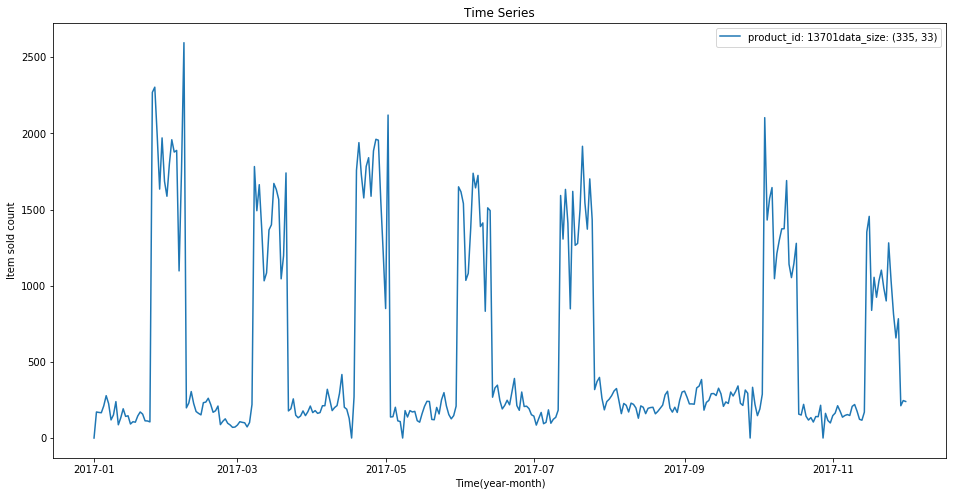

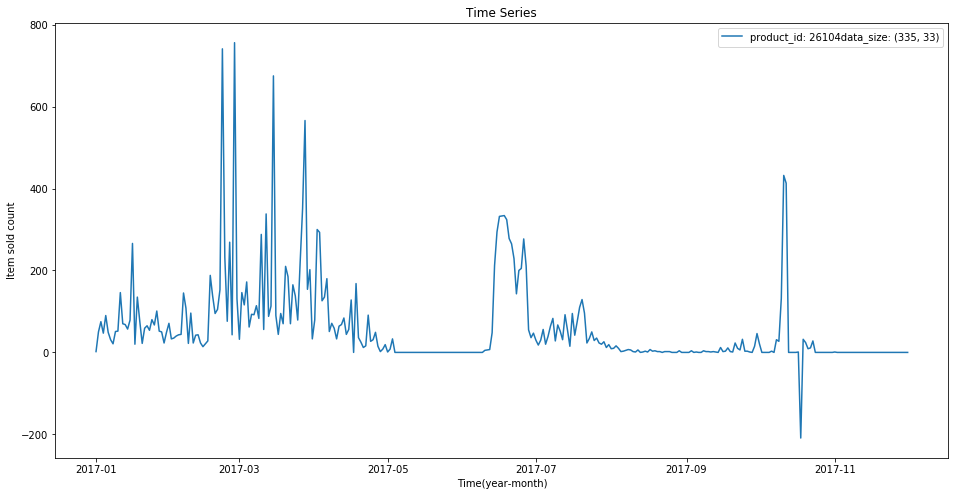

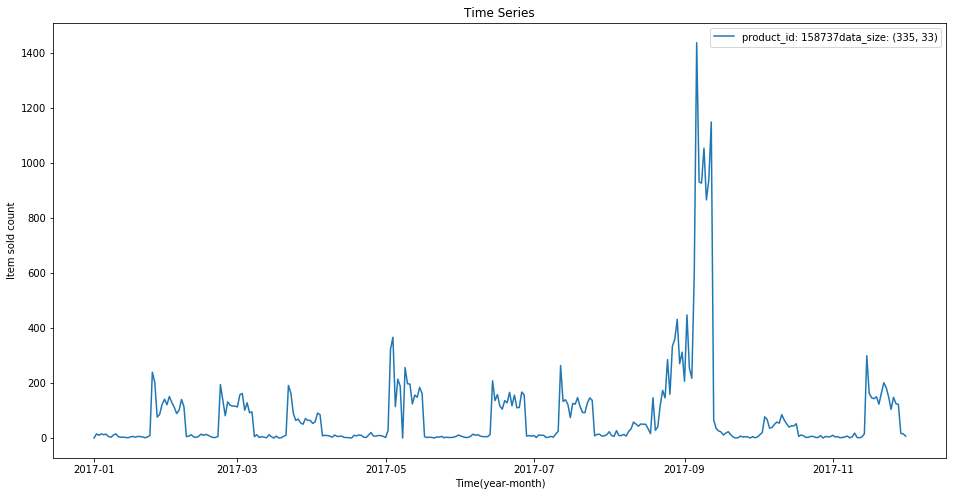

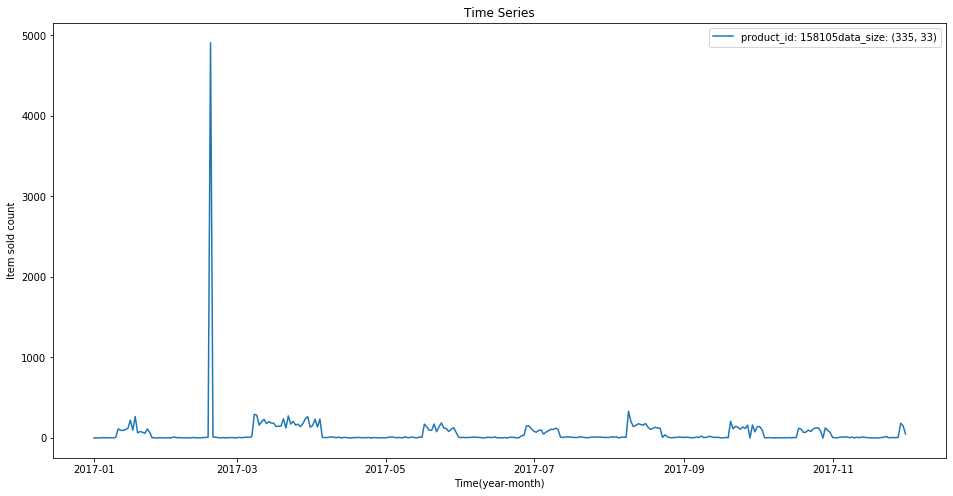

In [18]:
for i in range(len(products)):
    train_df=data[data['product_id']==products[i]]
      
    ts = train_df['volume_sold'] 
    plt.figure(figsize=(16,8)) 
    plt.plot(ts, label='product_id: '+str(products[i])+'data_size: '+str(train_df.shape))
    plt.title('Time Series') 
    plt.xlabel("Time(year-month)") 
    plt.ylabel("Item sold count") 
    plt.legend(loc='best')

In [19]:
for i in range(len(products)): 
    print("____________")
    print("Item: "+str(products[i]))
    print("First Date")
    print(data[data['product_id']==products[i]]['calendar_date'].min())
    print("Last Date")
    print(data[data['product_id']==products[i]]['calendar_date'].max())
    print("____________")
    

____________
Item: 13701
First Date
2017-01-01 00:00:00
Last Date
2017-12-01 00:00:00
____________
____________
Item: 26104
First Date
2017-01-01 00:00:00
Last Date
2017-12-01 00:00:00
____________
____________
Item: 158737
First Date
2017-01-01 00:00:00
Last Date
2017-12-01 00:00:00
____________
____________
Item: 158105
First Date
2017-01-01 00:00:00
Last Date
2017-12-01 00:00:00
____________


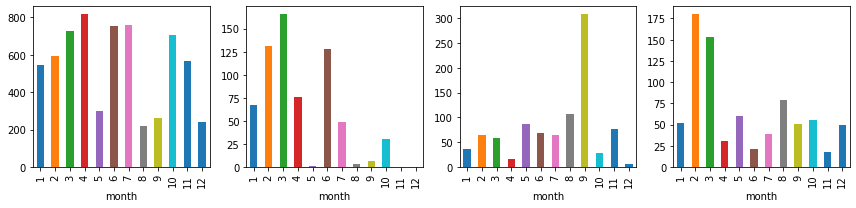

In [20]:
fig, axes = plt.subplots(1,4, figsize=(12,3))
for i in range(len(products)):
    data[data['product_id']==products[i]].groupby('month')['volume_sold'].mean().plot.bar(ax=axes[i],label='product_id: '+str(products[i]))
fig.tight_layout()
fig.show()

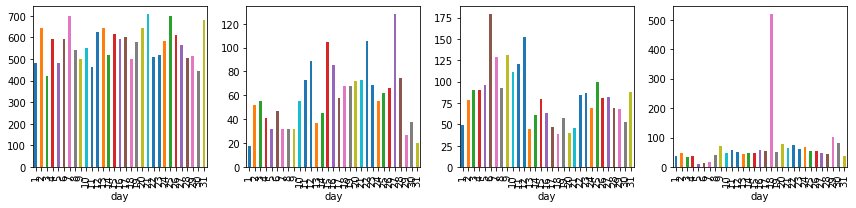

In [21]:
fig, axes = plt.subplots(1,4, figsize=(12,3))
for i in range(len(products)):
    data[data['product_id']==products[i]].groupby('day')['volume_sold'].mean().plot.bar(ax=axes[i])
fig.tight_layout()
fig.show()

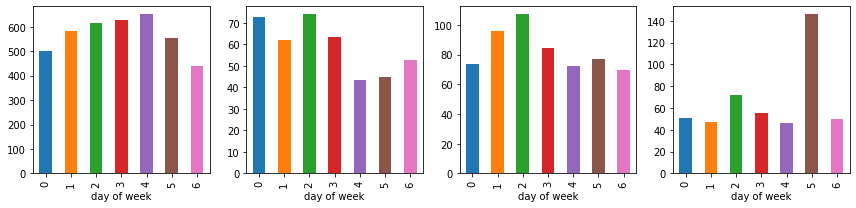

In [22]:
fig, axes = plt.subplots(1,4, figsize=(12,3))
for i in range(len(products)):
    data[data['product_id']==products[i]].groupby('day of week')['volume_sold'].mean().plot.bar(ax=axes[i])
fig.tight_layout()
fig.show()

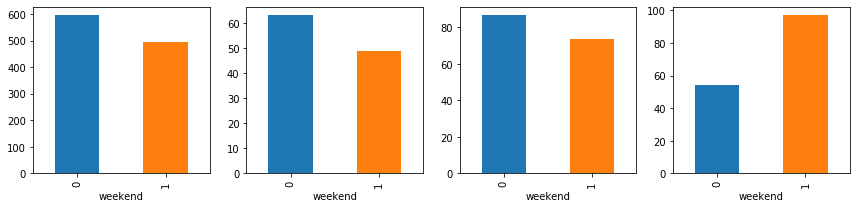

In [23]:
fig, axes = plt.subplots(1,4, figsize=(12,3))
for i in range(len(products)):
    data[data['product_id']==products[i]].groupby('weekend')['volume_sold'].mean().plot.bar(ax=axes[i])
fig.tight_layout()
fig.show()

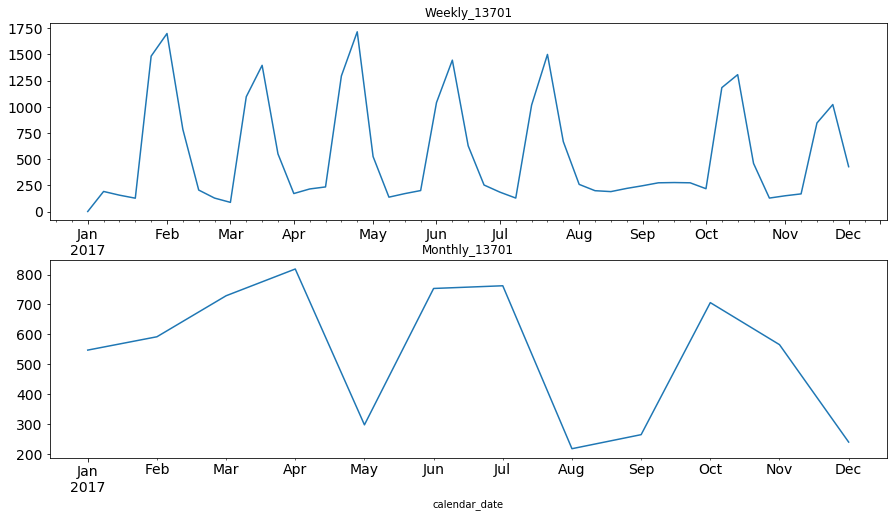

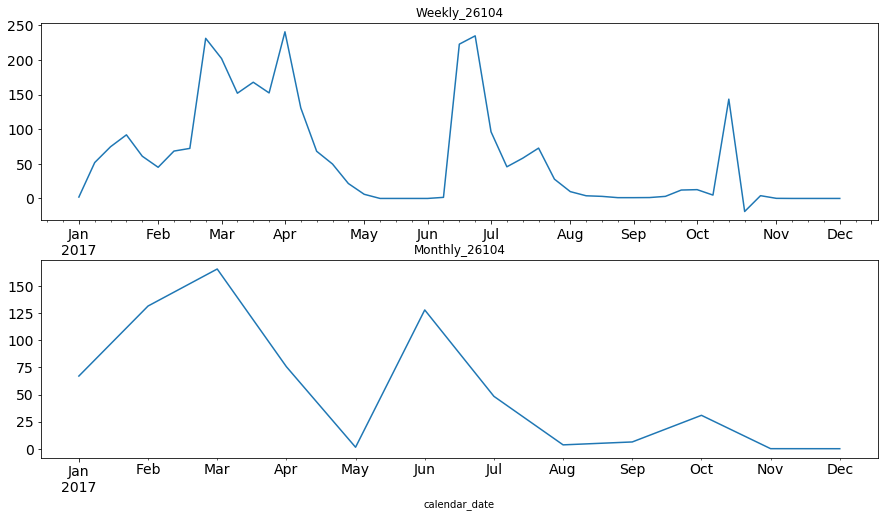

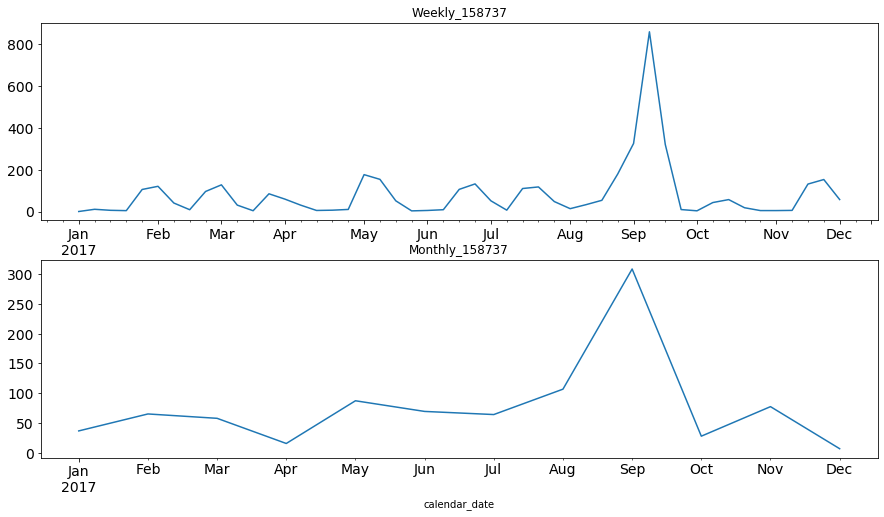

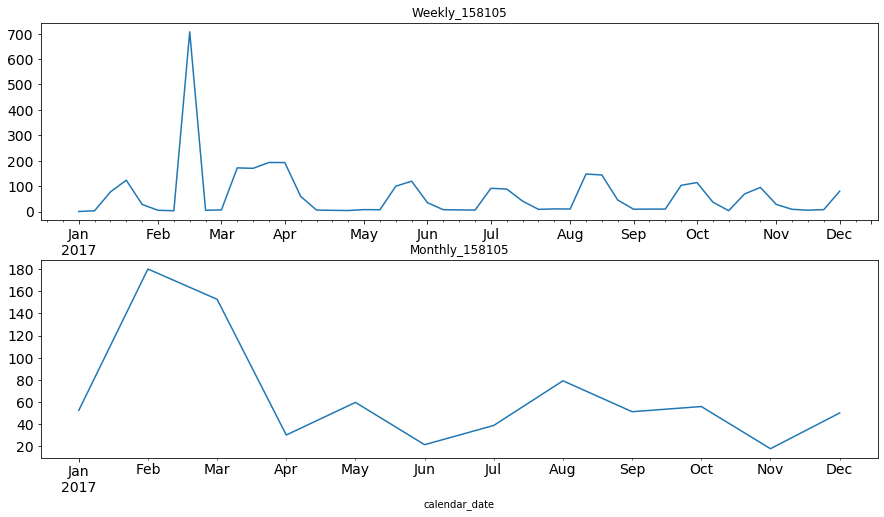

In [24]:
for i in range(len(products)):
    
    train_df=data[data['product_id']==products[i]]
    
    # Converting to weekly mean 
    weekly = train_df.resample('W').mean() 
    # Converting to monthly mean 
    monthly = train_df.resample('M').mean()
    
    fig, axs = plt.subplots(2,1) 
    weekly.volume_sold.plot(figsize=(15,8), title= 'Weekly_'+str(products[i]), fontsize=14, ax=axs[0]) 
    monthly.volume_sold.plot(figsize=(15,8), title= 'Monthly_'+str(products[i]), fontsize=14, ax=axs[1]) 

    plt.show()

In [25]:
Train=data.ix['2017-01-01':'2017-11-01'] 
valid=data.ix['2017-11-01':'2017-12-01']

/home/bhbhan/.conda/envs/newron_clone/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/bhbhan/.conda/envs/newron_clone/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [26]:
Train.shape

(1220, 33)

#### Timer Series Components

_______________________________________
Item: 13701


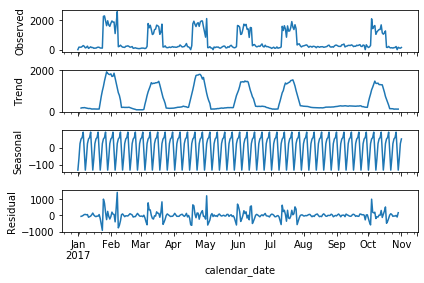

_______________________________________
Item: 26104


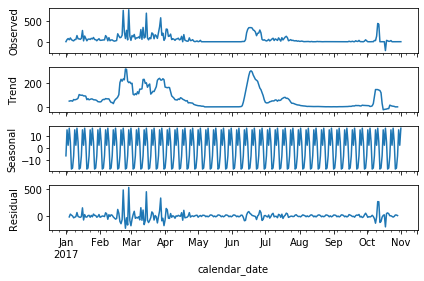

_______________________________________
Item: 158737


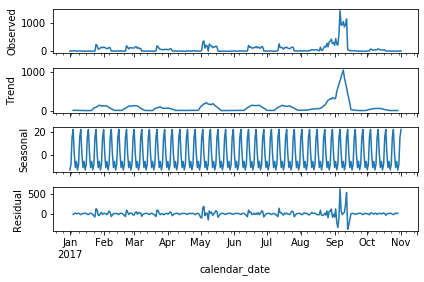

_______________________________________
Item: 158105


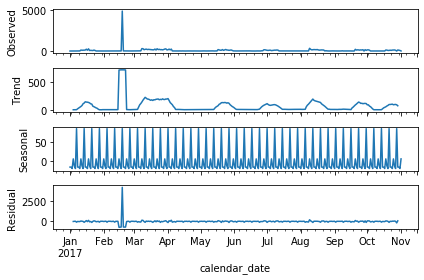

In [38]:
for i in range(len(products)):
    
    print("_______________________________________")
    print("Item: "+str(products[i]))
    
    Train_df=Train[Train['product_id']==products[i]]
    
    sm.tsa.seasonal_decompose(Train_df.volume_sold,freq=7).plot()
    result = sm.tsa.stattools.adfuller(Train_df.volume_sold) 
    plt.show()